<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/RNN_SineWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

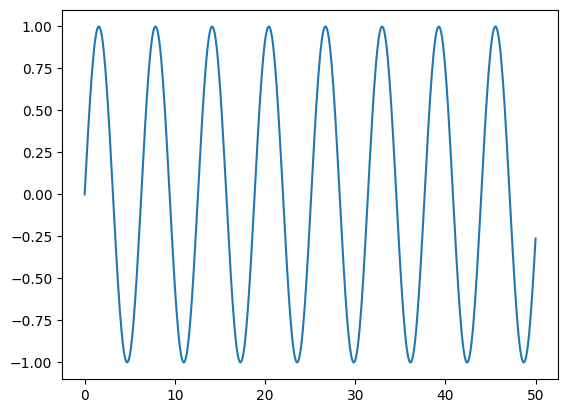

In [5]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [9]:
test_percent = 0.1 # 10 percent of the dataset will the test set

In [10]:
len(df) * test_percent

50.1

In [11]:
test_point = np.round(len(df) * test_percent)

In [12]:
test_point

50.0

In [13]:
test_index = int(len(df) - test_point)

In [14]:
train_set = df.iloc[:test_index]

In [16]:
test_set = df.iloc[test_index:]

Scaling the data
the label needs to be scaled too, since it's being fed into the network

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_set)

MinMaxScaler()

In [20]:
scaled_train_set = scaler.transform(train_set)

In [21]:
scaled_test_set = scaler.transform(test_set)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [56]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train_set,scaled_train_set,
                                length=length,batch_size=batch_size)

In [57]:
len(scaled_train_set)

451

In [58]:
len(generator)

449

In [59]:
X,y = generator[0]
print(X)
print()
print(y)

[[[0.49999912]
  [0.54991622]]]

[[0.59933458]]


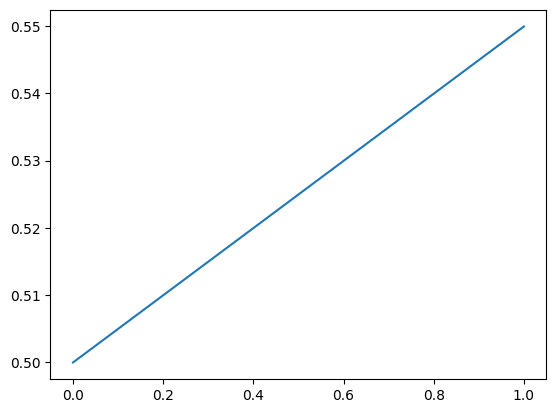

In [61]:
plt.plot(X[0])

In [68]:
# setting the length to a value that helps to properly capture the trend
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train_set,scaled_train_set,
                                length=length,batch_size=batch_size)

In [69]:
X,y = generator[0]

In [70]:
print(X)

[[[4.99999116e-01]
  [5.49916225e-01]
  [5.99334579e-01]
  [6.47760405e-01]
  [6.94709850e-01]
  [7.39713809e-01]
  [7.82322618e-01]
  [8.22110545e-01]
  [8.58680040e-01]
  [8.91665714e-01]
  [9.20737985e-01]
  [9.45606372e-01]
  [9.66022399e-01]
  [9.81782075e-01]
  [9.92727935e-01]
  [9.98750612e-01]
  [9.99789928e-01]
  [9.95835500e-01]
  [9.86926839e-01]
  [9.73152957e-01]
  [9.54651478e-01]
  [9.31607263e-01]
  [9.04250562e-01]
  [8.72854714e-01]
  [8.37733417e-01]
  [7.99237589e-01]
  [7.57751870e-01]
  [7.13690771e-01]
  [6.67494535e-01]
  [6.19624741e-01]
  [5.70559686e-01]
  [5.20789614e-01]
  [4.70811810e-01]
  [4.21125636e-01]
  [3.72227539e-01]
  [3.24606094e-01]
  [2.78737119e-01]
  [2.35078919e-01]
  [1.94067715e-01]
  [1.56113277e-01]
  [1.21594831e-01]
  [9.08572769e-02]
  [6.42077324e-02]
  [4.19124713e-02]
  [2.41942605e-02]
  [1.12301346e-02]
  [3.14962674e-03]
  [3.34747619e-05]
  [1.91281421e-03]
  [8.76886734e-03]]]


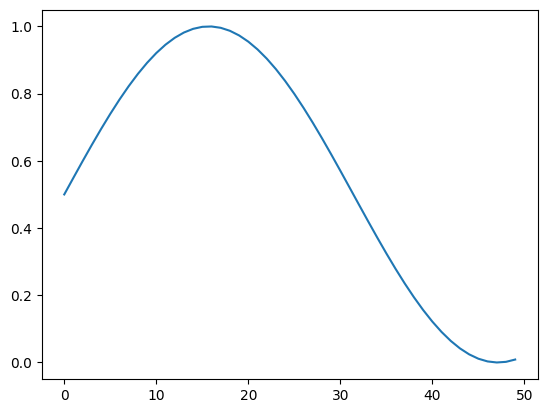

In [71]:
plt.plot(X[0])

# Creating the model

In [72]:
from tensorflow.keras.models import Sequential

In [73]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [74]:
n_features = 1

In [75]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 7s 14ms/step - loss: 0.0125
Epoch 2/5
401/401 [==============================] - 4s 10ms/step - loss: 1.2504e-04
Epoch 3/5
401/401 [==============================] - 4s 11ms/step - loss: 8.4476e-05
Epoch 4/5
401/401 [==============================] - 4s 11ms/step - loss: 1.4601e-04
Epoch 5/5
401/401 [==============================] - 5s 12ms/step - loss: 1.0447e-04


In [78]:
losses = pd.DataFrame(model.history.history)

<Axes: >

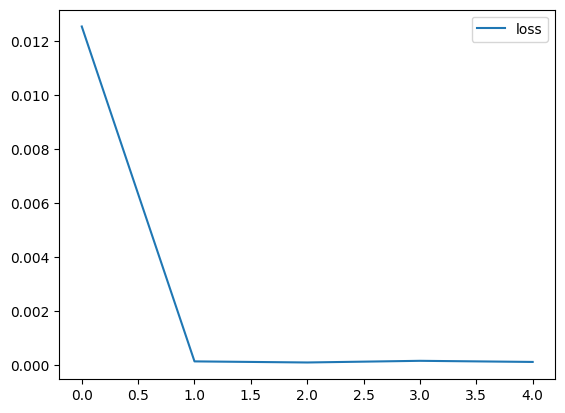

In [79]:
losses.plot()

In [81]:
first_eval_batch = scaled_train_set[-length:]

In [82]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [83]:
#reshaping to match model input shape

first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [84]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 967ms/step


array([[0.9345191]], dtype=float32)

In [86]:
scaled_test_set[0]

array([0.94955134])

In [89]:
# adding the prediction into a list / array to keep predicting on predictions
# in the current batch, we remove the first data point
# and append a prediction to the end
test_predictions = []
first_eval_batch = scaled_train_set[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

print(first_eval_batch)
# dropping the first point: current_batch[:,1:,:]
print(np.append(current_batch[:,1:,:],[[[99]]],axis=1))

[[8.37405820e-01]
 [7.98881698e-01]
 [7.57371240e-01]
 [7.13289205e-01]
 [6.67076045e-01]
 [6.19193508e-01]
 [5.70120021e-01]
 [5.20345908e-01]
 [4.70368497e-01]
 [4.20687145e-01]
 [3.71798252e-01]
 [3.24190300e-01]
 [2.78338972e-01]
 [2.34702398e-01]
 [1.93716581e-01]
 [1.55791039e-01]
 [1.21304709e-01]
 [9.06021693e-02]
 [6.39901882e-02]
 [4.17346643e-02]
 [2.40579672e-02]
 [1.11367167e-02]
 [3.10001778e-03]
 [2.81703720e-05]
 [1.95186738e-03]
 [8.85188786e-03]
 [2.06592891e-02]
 [3.72560954e-02]
 [5.84764771e-02]
 [8.41084070e-02]
 [1.13895779e-01]
 [1.47540969e-01]
 [1.84707803e-01]
 [2.25024924e-01]
 [2.68089497e-01]
 [3.13471233e-01]
 [3.60716695e-01]
 [4.09353821e-01]
 [4.58896644e-01]
 [5.08850150e-01]
 [5.58715219e-01]
 [6.07993616e-01]
 [6.56192968e-01]
 [7.02831682e-01]
 [7.47443761e-01]
 [7.89583454e-01]
 [8.28829716e-01]
 [8.64790412e-01]
 [8.97106234e-01]
 [9.25454293e-01]]
[[[7.98881698e-01]
  [7.57371240e-01]
  [7.13289205e-01]
  [6.67076045e-01]
  [6.19193508e-01]
  [5

In [90]:
for i in range(len(test_set)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  
  # updating the current prediction by adding the prediction to the end
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 35ms/step


In [91]:
test_predictions

[array([0.9345191], dtype=float32),
 array([0.9517056], dtype=float32),
 array([0.9647827], dtype=float32),
 array([0.9715584], dtype=float32),
 array([0.9672269], dtype=float32),
 array([0.96237236], dtype=float32),
 array([0.9572903], dtype=float32),
 array([0.94258446], dtype=float32),
 array([0.922207], dtype=float32),
 array([0.90349483], dtype=float32),
 array([0.8813898], dtype=float32),
 array([0.8512022], dtype=float32),
 array([0.8189661], dtype=float32),
 array([0.7896047], dtype=float32),
 array([0.7560334], dtype=float32),
 array([0.71430725], dtype=float32),
 array([0.6740931], dtype=float32),
 array([0.63696027], dtype=float32),
 array([0.59356856], dtype=float32),
 array([0.54670113], dtype=float32),
 array([0.50464076], dtype=float32),
 array([0.4628778], dtype=float32),
 array([0.4133861], dtype=float32),
 array([0.36582312], dtype=float32),
 array([0.32673055], dtype=float32),
 array([0.28564712], dtype=float32),
 array([0.23797515], dtype=float32),
 array([0.1968483

In [92]:
true_predictions = scaler.inverse_transform(test_predictions)

In [94]:
true_predictions

array([[ 0.86903302],
       [ 0.90340567],
       [ 0.92955974],
       [ 0.94311098],
       [ 0.93444811],
       [ 0.92473907],
       [ 0.91457501],
       [ 0.88516357],
       [ 0.84440899],
       [ 0.80698496],
       [ 0.76277524],
       [ 0.70240051],
       [ 0.63792883],
       [ 0.57920657],
       [ 0.5120645 ],
       [ 0.42861283],
       [ 0.34818523],
       [ 0.27392011],
       [ 0.18713739],
       [ 0.09340329],
       [ 0.00928321],
       [-0.07424202],
       [-0.17322463],
       [-0.26834984],
       [-0.34653435],
       [-0.42870054],
       [-0.52404373],
       [-0.60629658],
       [-0.66836019],
       [-0.73570277],
       [-0.80867786],
       [-0.85571978],
       [-0.89121112],
       [-0.93948018],
       [-0.97407174],
       [-0.97909142],
       [-0.98280425],
       [-1.00307973],
       [-0.99987633],
       [-0.96557857],
       [-0.9470746 ],
       [-0.93688829],
       [-0.88951284],
       [-0.82986203],
       [-0.79911672],
       [-0

In [95]:
test_set['Predictions'] = true_predictions

<ipython-input-95-22ce99fad483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = true_predictions


In [96]:
test_set

,Sine,Predictions
45.1,0.899097,0.869033
45.2,0.938307,0.903406
45.3,0.968142,0.929560
45.4,0.988304,0.943111
45.5,0.998591,0.934448
45.6,0.998900,0.924739
45.7,0.989229,0.914575
45.8,0.969673,0.885164
45.9,0.940429,0.844409
46.0,0.901788,0.806985


<Axes: >

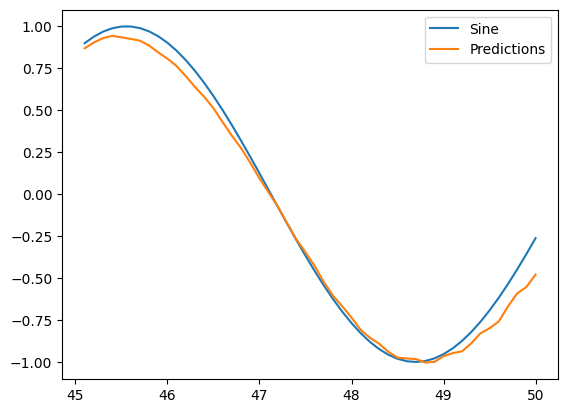

In [98]:
test_set.plot()